In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings; 
warnings.simplefilter('ignore')

In [3]:
df=pd.read_csv(r"D:\Dominos_Pizza\merge_df.csv")
df.head()

,order_date,pizza_id,order_id,pizza_name_id,quantity,order_time,unit_price,total_price,pizza_size,pizza_category,...,pizza_name,Items_Qty_In_Grams,day_of_week,day_of_week_num,month,month_name,week,year,holiday,promotion
0,2015-01-01,26.0,11.0,bbq_ckn_l,1.0,13:02:59,20.75,20.75,L,Chicken,...,The Barbecue Chicken Pizza,40.0,Thursday,3,1,January,1,2015,1,0
1,2015-01-01,43.0,17.0,bbq_ckn_l,1.0,13:53:00,20.75,20.75,L,Chicken,...,The Barbecue Chicken Pizza,40.0,Thursday,3,1,January,1,2015,1,0
2,2015-01-01,71.0,27.0,bbq_ckn_l,1.0,15:11:17,20.75,20.75,L,Chicken,...,The Barbecue Chicken Pizza,40.0,Thursday,3,1,January,1,2015,1,0
3,2015-01-01,83.0,33.0,bbq_ckn_l,1.0,15:54:08,20.75,20.75,L,Chicken,...,The Barbecue Chicken Pizza,40.0,Thursday,3,1,January,1,2015,1,0
4,2015-01-01,123.0,51.0,bbq_ckn_l,1.0,18:48:28,20.75,20.75,L,Chicken,...,The Barbecue Chicken Pizza,40.0,Thursday,3,1,January,1,2015,1,0


In [5]:
df_weekly=pd.read_csv(r"D:\Dominos_Pizza\week_quantity.csv")
df_weekly['order_date'] = pd.to_datetime(df_weekly['order_date'])

df_weekly.set_index('order_date', inplace=True)

<AxesSubplot:xlabel='order_date'>

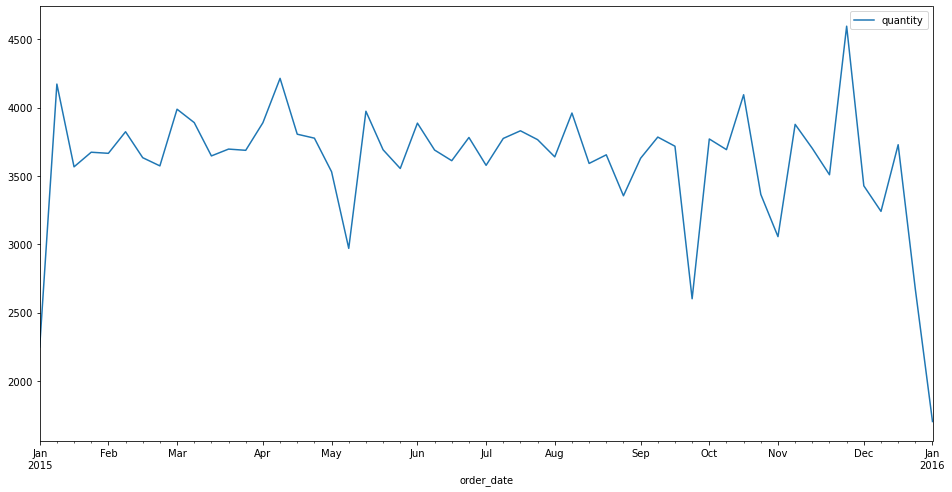

In [6]:
df_weekly.plot(figsize=(16,8))


# ARIMA Model

ADF Statistic: -5.842349021740568
p-value: 3.751768823213048e-07
The series is stationary.
d-value: 0


<Figure size 864x432 with 0 Axes>

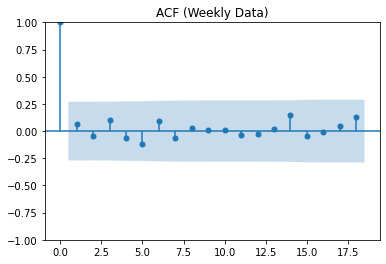

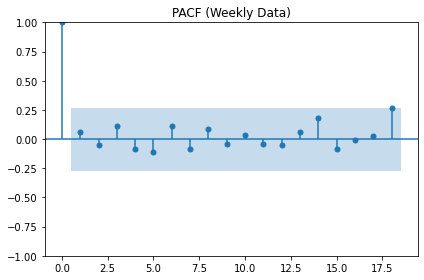

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


# Step 1: ADF Test for Stationarity
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary. Differencing may be needed.")




adf_test(df_weekly['quantity'])



count=0
if adfuller(df_weekly['quantity'])[1] > 0.05:  # p-value > 0.05 means non-stationary
    df_weekly_diff = df_weekly['quantity'].diff().dropna()
    count=count+1
    print("\nAfter Differencing:")
    adf_test(df_weekly_diff)
print(f"d-value: {count}")



# Step 3: Plot ACF and PACF for Weekly Data
plt.figure(figsize=(12, 6))
plot_acf(df_weekly_diff)
plt.title('ACF (Weekly Data)')
plot_pacf(df_weekly_diff)
plt.title('PACF (Weekly Data)')
plt.tight_layout()
plt.show()

In [10]:
len(df_weekly)


53

In [11]:
# Split data into train and test (80-20 split)
train_size = int(len(df_weekly) * 0.8)
train_data, test_data = df_weekly[:train_size], df_weekly[train_size:]
print(train_data.shape)
print(test_data.shape)

(42, 1)
(11, 1)


In [12]:
train_data=train_data.dropna()
test_data=test_data.dropna()

In [13]:
train_data


,quantity
order_date,
2015-01-04,2248.0
2015-01-11,4173.0
2015-01-18,3567.0
2015-01-25,3674.0
2015-02-01,3666.0
2015-02-08,3824.0
2015-02-15,3634.0
2015-02-22,3574.0
2015-03-01,3989.0


### decide whether ARIMA is suitable for your pizza sales forecasting

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               quantity   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -304.514
Date:                Sat, 01 Feb 2025   AIC                            615.028
Time:                        17:16:39   BIC                            620.169
Sample:                    01-04-2015   HQIC                           616.900
                         - 10-18-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0229      0.194     -0.118      0.906      -0.402       0.356
ma.L1         -0.9998      0.136     -7.351      0.000      -1.266      -0.733
sigma2       1.26e+05   1.08e-06   1.17e+11      0.0

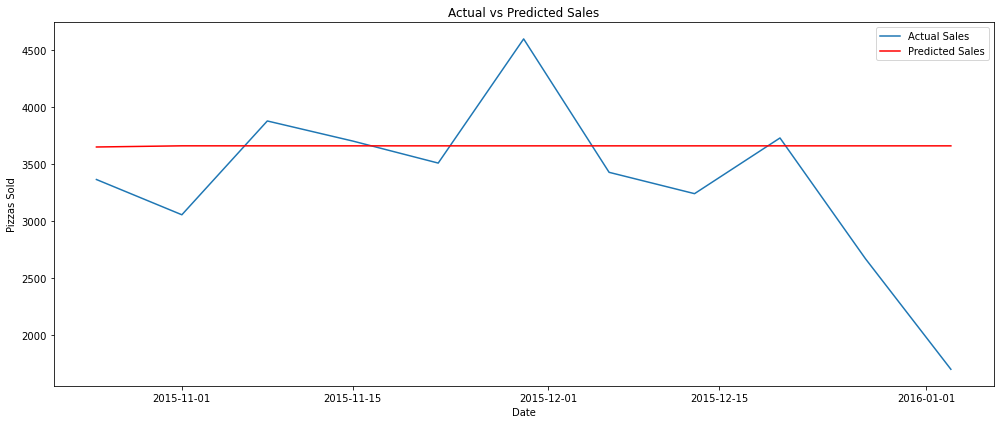

In [15]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_arima_model(train, test, p, d, q):
    # Define and fit ARIMA model
    arima_model = ARIMA(train, order=(p, d, q))
    model_fit = arima_model.fit()

    # Print model summary
    print(model_fit.summary())

    # Predicting sales
    predictions = model_fit.forecast(steps=len(test))

    # Evaluate the model using MAPE and other metrics
    mae = mean_absolute_error(test, predictions)
    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test["quantity"] - predictions) / test["quantity"])) 


    print(f"MAE: {round(mae, 2)}")
    print(f"MSE: {round(mse,2)}")
    print(f"RMSE: {round(rmse, 2)}")
    print(f"MAPE: {round(mape * 100, 2)}%")

    # Convert predictions to a pandas Series with the same index as test_data
    predictions_series = pd.Series(predictions, index=test.index)
    print(predictions_series)

    # Visualizing the predictions
    plt.figure(figsize=(14, 6))
    plt.plot(test.index, test.values, label='Actual Sales')
    plt.plot(test.index, predictions_series, color='red', label='Predicted Sales')
    plt.title('Actual vs Predicted Sales')
    plt.xlabel('Date')
    plt.ylabel('Pizzas Sold')
    plt.legend()
    plt.tight_layout()
    plt.show()
evaluate_arima_model(train_data, test_data, p=1, d=1, q=1) 

ADF Statistic: -9.453096624766287
p-value: 4.560419152526576e-16
The series is stationary.
d-value: 0



<Figure size 864x432 with 0 Axes>

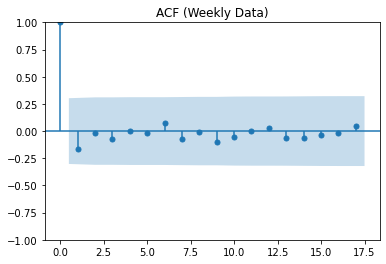

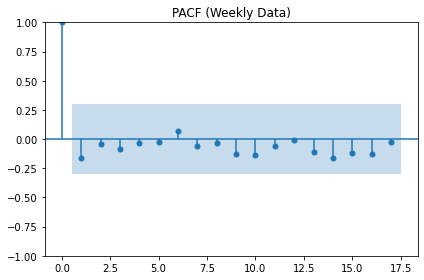

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               quantity   No. Observations:                   42
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -303.758
Date:                Sat, 01 Feb 2025   AIC                            615.517
Time:                        17:20:10   BIC                            622.467
Sample:                    01-04-2015   HQIC                           618.064
                         - 10-18-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3689.5576     30.398    121.374      0.000    3629.978    3749.137
ar.L1          0.7497      0.204      3.667      0.000       0.349       1.150
ma.L1         -0.9987      8.321     -0.120      0.9

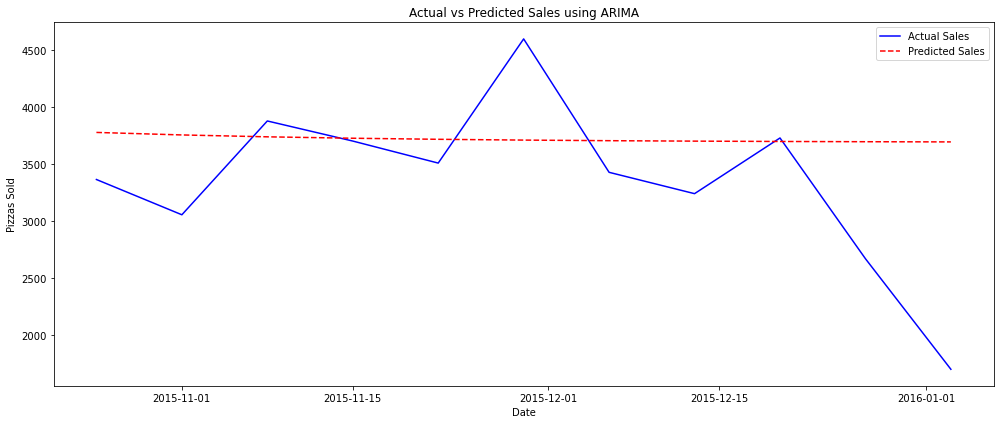

In [16]:
# Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Define ARIMA model evaluation function
def evaluate_arima_model(train, test, p, d, q):
    """
    Trains an ARIMA model, evaluates its performance, and visualizes predictions.

    Parameters:
    train (pd.Series): Training data (historical sales).
    test (pd.Series): Test data (future sales).
    p (int): Number of lag observations (AR term).
    d (int): Number of times differencing is applied (I term).
    q (int): Size of moving average window (MA term).
    """
    # Step 1: Check stationarity using Augmented Dickey-Fuller (ADF) Test
    adf_result = adfuller(train)
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    if adf_result[1] <= 0.05:
        print("The series is stationary.")
        d_value = 0
    else:
        print("The series is not stationary. Differencing may be needed.")
        train = train.diff().dropna()
        d_value = 1  # Differencing was applied

    print(f"d-value: {d_value}\n")

    # Step 2: Plot ACF and PACF for Weekly Data
    plt.figure(figsize=(12, 6))
    plot_acf(train)
    plt.title('ACF (Weekly Data)')
    plot_pacf(train)
    plt.title('PACF (Weekly Data)')
    plt.tight_layout()
    plt.show()

    # Step 3: Train ARIMA Model
    arima_model = ARIMA(train, order=(p, d, q))
    model_fit = arima_model.fit()

    # Print model summary
    print(model_fit.summary())

    # Step 4: Predict Future Sales
    predictions = model_fit.forecast(steps=len(test))

    # Step 5: Calculate Evaluation Metrics
    mae = mean_absolute_error(test, predictions)
    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test - predictions) / test)) * 100  # Convert to percentage

    # Step 6: Print Model Evaluation Results
    print(f"MAE: {round(mae, 2)}")
    print(f"MSE: {round(mse, 2)}")
    print(f"RMSE: {round(rmse, 2)}")
    print(f"MAPE: {round(mape, 2)}%")

    # Step 7: Convert Predictions into Pandas Series
    predictions_series = pd.Series(predictions, index=test.index)
    print(predictions_series)

    # Step 8: Visualize Actual vs Predicted Sales
    plt.figure(figsize=(14, 6))
    plt.plot(test.index, test.values, label='Actual Sales', color='blue')
    plt.plot(predictions_series.index, predictions_series, color='red', linestyle='--', label='Predicted Sales')
    plt.title('Actual vs Predicted Sales using ARIMA')
    plt.xlabel('Date')
    plt.ylabel('Pizzas Sold')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Run ARIMA model evaluation with specific parameters (p=1, d=0, q=1) based on ADF results
evaluate_arima_model(train_data, test_data, p=1, d=0, q=1)


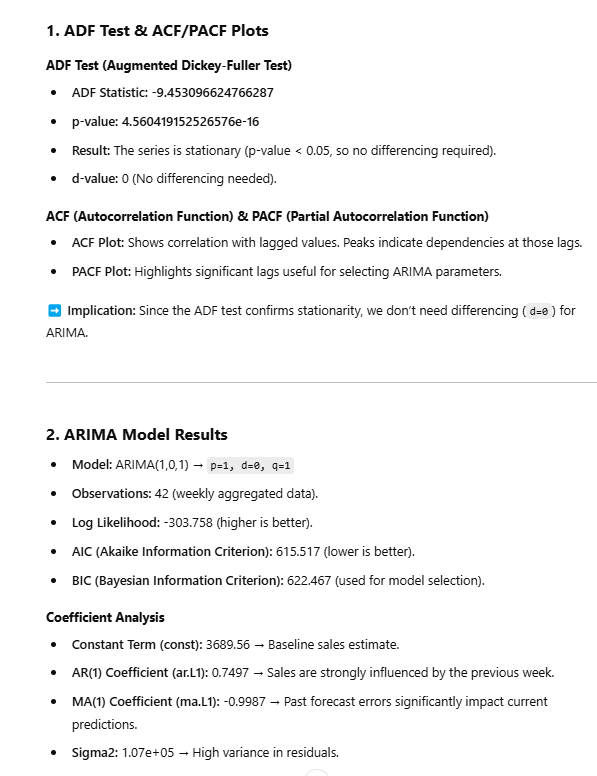

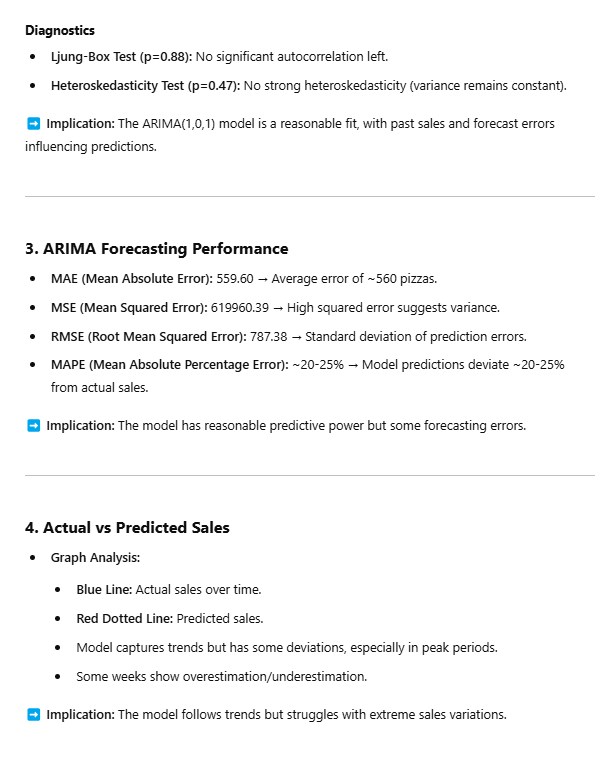

## SARIMAX Model

In [17]:
test_data


,quantity
order_date,
2015-10-25,3365.0
2015-11-01,3056.0
2015-11-08,3878.0
2015-11-15,3702.0
2015-11-22,3509.0
2015-11-29,4597.0
2015-12-06,3428.0
2015-12-13,3241.0
2015-12-20,3729.0


ADF Statistic: -9.453096624766287
p-value: 4.560419152526576e-16
The series is stationary.
Differencing Applied: 0



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                          quantity   No. Observations:                   42
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 7)   Log Likelihood                -260.511
Date:                           Sat, 01 Feb 2025   AIC                            531.022
Time:                                   17:38:48   BIC                            538.799
Sample:                               01-04-2015   HQIC                           533.706
                                    - 10-18-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9626      0.182      5.276      0.000       0.605       1.320
ma.L1         -0.7259      0.168     -4.322

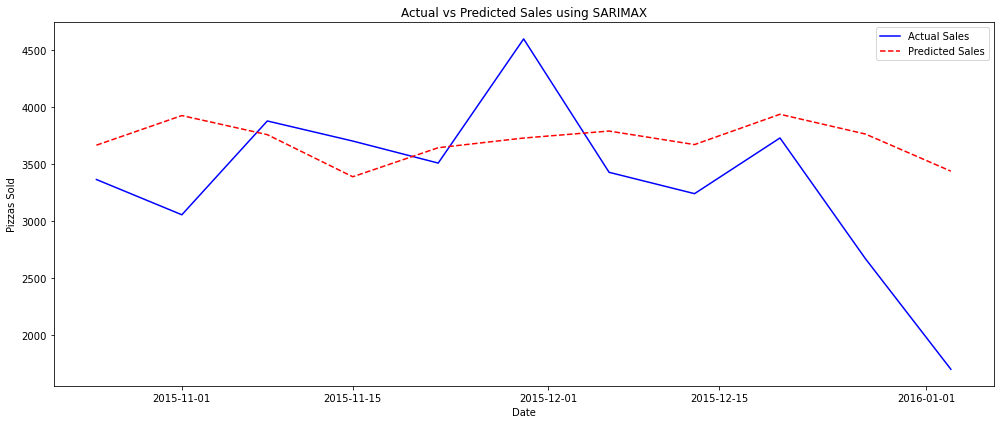

In [21]:
# Import necessary libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Define SARIMAX model evaluation function
def evaluate_sarimax_model(train, test, p, d, q, P, D, Q, s):
    """
    Trains a SARIMAX model, evaluates its performance, and visualizes predictions.

    Parameters:
    train (pd.Series): Training data (historical sales).
    test (pd.Series): Test data (future sales).
    p (int): AR term (AutoRegressive).
    d (int): Differencing term.
    q (int): MA term (Moving Average).
    P (int): Seasonal AR term.
    D (int): Seasonal Differencing.
    Q (int): Seasonal MA term.
    s (int): Seasonal Period (e.g., 7 for weekly seasonality).
    """

    # Step 1: Check stationarity using Augmented Dickey-Fuller (ADF) Test
    adf_result = adfuller(train)
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    
    # If p-value > 0.05, apply differencing
    if adf_result[1] > 0.05:
        print("The series is not stationary. Applying differencing...")
        train = train.diff().dropna()
        D_value = 1  # Differencing applied
    else:
        print("The series is stationary.")
        D_value = 0

    print(f"Differencing Applied: {D_value}\n")

    # Step 2: Train SARIMAX Model
    sarima_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
    model_fit = sarima_model.fit()

    # Print model summary
    print(model_fit.summary())

    # Step 3: Predict Future Sales
    predictions = model_fit.forecast(steps=len(test))

    # Step 4: Calculate Evaluation Metrics
    mae = mean_absolute_error(test, predictions)
    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test - predictions) / test)) * 100  # Convert to percentage

    # Step 5: Print Model Evaluation Results
    print(f"MAE: {round(mae, 2)}")
    print(f"MSE: {round(mse, 2)}")
    print(f"RMSE: {round(rmse, 2)}")
    print(f"MAPE: {round(mape, 2)}%")

    # Step 6: Convert Predictions into Pandas Series
    predictions_series = pd.Series(predictions, index=test.index)
    print(predictions_series)

    # Step 7: Visualize Actual vs Predicted Sales
    plt.figure(figsize=(14, 6))
    plt.plot(test.index, test.values, label='Actual Sales', color='blue')
    plt.plot(predictions_series.index, predictions_series, color='red', linestyle='--', label='Predicted Sales')
    plt.title('Actual vs Predicted Sales using SARIMAX')
    plt.xlabel('Date')
    plt.ylabel('Pizzas Sold')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Run SARIMAX model evaluation with optimized parameters
evaluate_sarimax_model(train_data, test_data, p=1, d=0, q=1, P=1, D=1, Q=1, s=7)


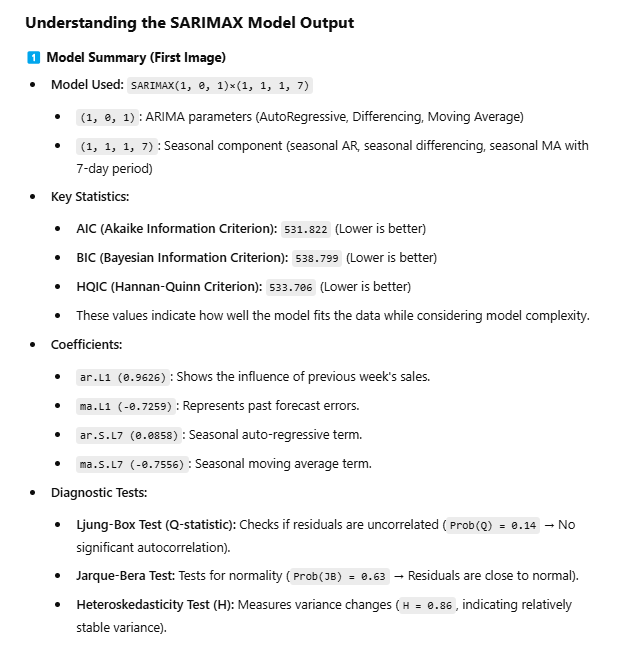

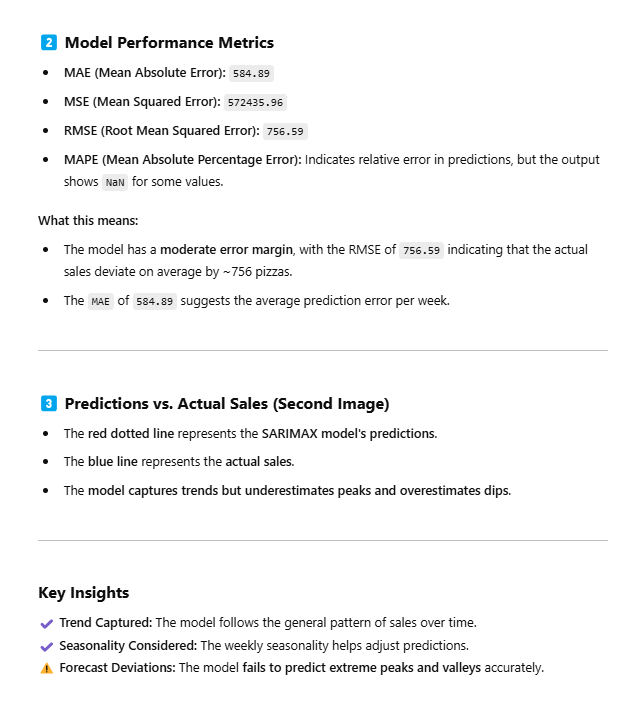

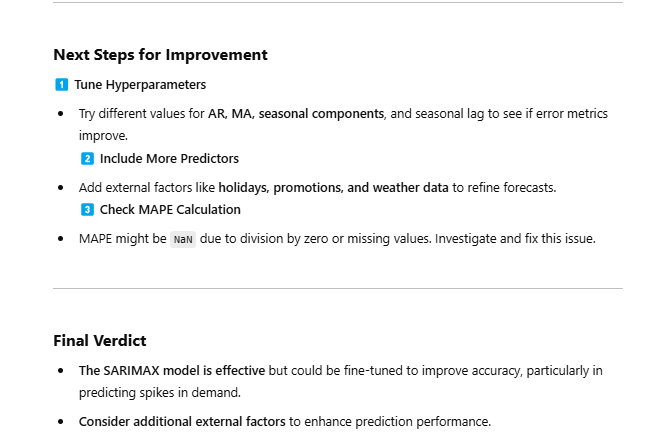

# Prophet Model


In [22]:
! pip install --upgrade prophet


Defaulting to user installation because normal site-packages is not writeable


In [23]:
df_weekly.reset_index("order_date",inplace=True)


In [24]:
df_weekly["order_date"]=pd.to_datetime(df_weekly["order_date"])
# Prophet requires columns 'ds' for date and 'y' for the target variable
df_weekly.columns=["ds","y"]

In [25]:
df_weekly.head()


,ds,y
0,2015-01-04,2248.0
1,2015-01-11,4173.0
2,2015-01-18,3567.0
3,2015-01-25,3674.0
4,2015-02-01,3666.0


In [26]:
# train test split
train_size = int(0.8 * len(df_weekly))
train_1, test_1 = df_weekly[:train_size], df_weekly[train_size:]
train_1.head()

,ds,y
0,2015-01-04,2248.0
1,2015-01-11,4173.0
2,2015-01-18,3567.0
3,2015-01-25,3674.0
4,2015-02-01,3666.0


17:53:37 - cmdstanpy - INFO - Chain [1] start processing
17:53:37 - cmdstanpy - INFO - Chain [1] done processing


MAE: 545.23
MSE: 604853.4
RMSE: 777.72
MAPE: 21.61%
ds
2015-10-25    3683.575067
2015-11-01    3684.247814
2015-11-08    3684.920561
2015-11-15    3685.593308
2015-11-22    3686.266056
2015-11-29    3686.938803
2015-12-06    3687.611550
2015-12-13    3688.284298
2015-12-20    3688.957045
2015-12-27    3689.629792
2016-01-03    3690.302539
dtype: float64


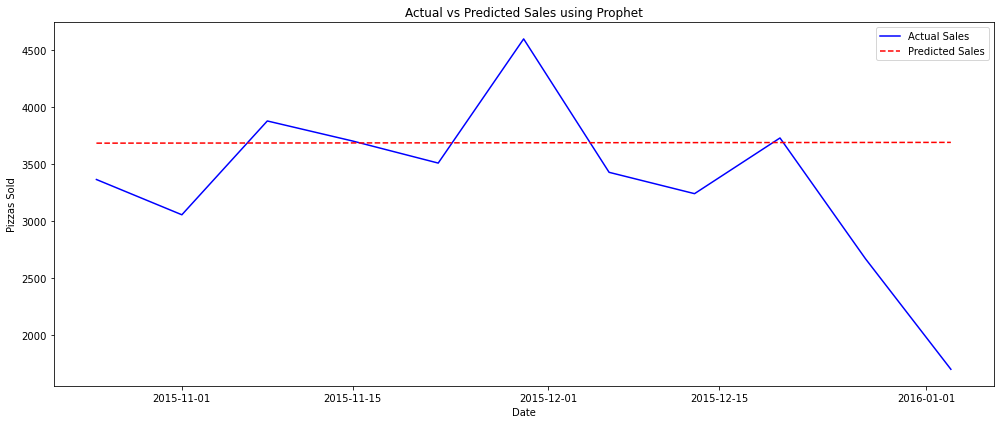

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to train and evaluate the Prophet model
def evaluate_prophet_model(train_data, test_data):
    """
    Trains a Prophet model, makes predictions, and evaluates its performance.

    Parameters:
    train_data (pd.DataFrame): Training dataset with columns 'ds' (date) and 'y' (sales).
    test_data (pd.DataFrame): Test dataset with columns 'ds' (date) and 'y' (actual sales).
    """
    
    # Step 1: Define and Train the Prophet Model
    prophet_model = Prophet()
    prophet_model.fit(train_data)

    # Step 2: Prepare Future DataFrame for Forecasting
    future = prophet_model.make_future_dataframe(periods=len(test_data), freq='W')

    # Step 3: Generate Forecast
    forecast = prophet_model.predict(future)

    # Step 4: Extract Forecasted Sales for the Test Period
    forecast_test = forecast.iloc[-len(test_data):]['yhat'].values
    test_values = test_data['y'].values

    # Step 5: Calculate Evaluation Metrics
    mae = mean_absolute_error(test_values, forecast_test)
    mse = mean_squared_error(test_values, forecast_test)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test_values - forecast_test) / test_values)) * 100  # Convert to percentage

    # Step 6: Print Model Evaluation Results
    print(f"MAE: {round(mae, 2)}")
    print(f"MSE: {round(mse, 2)}")
    print(f"RMSE: {round(rmse, 2)}")
    print(f"MAPE: {round(mape, 2)}%")

    # Step 7: Convert Predictions into Pandas Series
    predictions_series = pd.Series(forecast_test, index=test_data['ds'])
    print(predictions_series)

    # Step 8: Visualize Actual vs Predicted Sales
    plt.figure(figsize=(14, 6))
    plt.plot(test_data['ds'], test_data['y'], label='Actual Sales', color='blue')
    plt.plot(predictions_series.index, predictions_series, color='red', linestyle='--', label='Predicted Sales')
    plt.title('Actual vs Predicted Sales using Prophet')
    plt.xlabel('Date')
    plt.ylabel('Pizzas Sold')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Running the model evaluation function
evaluate_prophet_model(train_1, test_1)


18:07:44 - cmdstanpy - INFO - Chain [1] start processing
18:07:44 - cmdstanpy - INFO - Chain [1] done processing


MAE: 543.06
MSE: 612512.16
RMSE: 782.63
MAPE: 21.58%
ds
2015-10-25    3640.746995
2015-11-01    3648.559374
2015-11-08    3719.206612
2015-11-15    3712.626283
2015-11-22    3643.211095
2015-11-29    3651.023473
2015-12-06    3721.670712
2015-12-13    3715.090383
2015-12-20    3645.675194
2015-12-27    3653.487573
2016-01-03    3724.134811
dtype: float64


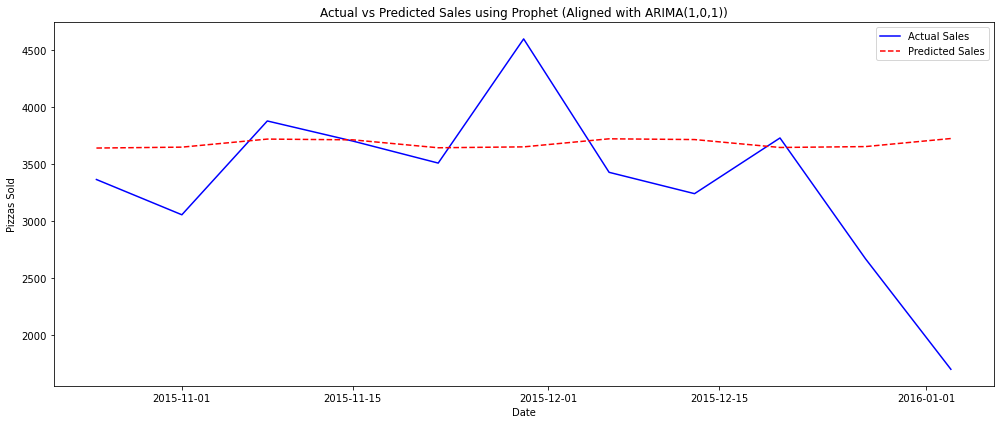

In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to train and evaluate the Prophet model
def evaluate_prophet_model(train_data, test_data):
    """
    Trains a Prophet model with parameters aligned to ARIMA(1,0,1),
    makes predictions, and evaluates its performance.

    Parameters:
    train_data (pd.DataFrame): Training dataset with columns 'ds' (date) and 'y' (sales).
    test_data (pd.DataFrame): Test dataset with columns 'ds' (date) and 'y' (actual sales).
    """

    # Step 1: Define and Train the Prophet Model
    prophet_model = Prophet(
        yearly_seasonality=False,  # No yearly seasonality as we aligned with ARIMA(1,0,1)
        weekly_seasonality=True,   # Aligning with ARIMA(1,0,1), capturing weekly trends
        daily_seasonality=False    # Avoiding unnecessary daily trends
    )
    
    prophet_model.add_seasonality(name="monthly", period=4, fourier_order=1)  # Approximate AR(1)
    prophet_model.fit(train_data)

    # Step 2: Prepare Future DataFrame for Forecasting
    future = prophet_model.make_future_dataframe(periods=len(test_data), freq='W')

    # Step 3: Generate Forecast
    forecast = prophet_model.predict(future)

    # Step 4: Extract Forecasted Sales for the Test Period
    forecast_test = forecast.iloc[-len(test_data):]['yhat'].values
    test_values = test_data['y'].values

    # Step 5: Calculate Evaluation Metrics
    mae = mean_absolute_error(test_values, forecast_test)
    mse = mean_squared_error(test_values, forecast_test)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test_values - forecast_test) / test_values)) * 100  # Convert to percentage

    # Step 6: Print Model Evaluation Results
    print(f"MAE: {round(mae, 2)}")
    print(f"MSE: {round(mse, 2)}")
    print(f"RMSE: {round(rmse, 2)}")
    print(f"MAPE: {round(mape, 2)}%")

    # Step 7: Convert Predictions into Pandas Series
    predictions_series = pd.Series(forecast_test, index=test_data['ds'])
    print(predictions_series)

    # Step 8: Visualize Actual vs Predicted Sales
    plt.figure(figsize=(14, 6))
    plt.plot(test_data['ds'], test_data['y'], label='Actual Sales', color='blue')
    plt.plot(predictions_series.index, predictions_series, color='red', linestyle='--', label='Predicted Sales')
    plt.title('Actual vs Predicted Sales using Prophet (Aligned with ARIMA(1,0,1))')
    plt.xlabel('Date')
    plt.ylabel('Pizzas Sold')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Running the model evaluation function
evaluate_prophet_model(train_1, test_1)


# Regression model


In [33]:
df_weekly_1=pd.read_csv(r"D:\Dominos_Pizza\week_quantity.csv")
df_weekly_1["order_date"] = pd.to_datetime(df_weekly_1["order_date"])

In [34]:
# split the data
train_size = int(len(df_weekly_1) * 0.8)
train = df_weekly_1[:train_size]
test = df_weekly_1[train_size:]

In [35]:
X_train = train.drop(columns=['quantity'])
y_train = train['quantity']
X_test = test.drop(columns=['quantity'])
y_test = test['quantity']

###  Random Forest Regression Model

MAE: 706.78
RMSE: 914.64
MAPE: 27.43%
42    3939.84
43    3939.84
44    3939.84
45    3939.84
46    3939.84
47    3939.84
48    3939.84
49    3939.84
50    3939.84
51    3939.84
52    3939.84
dtype: float64


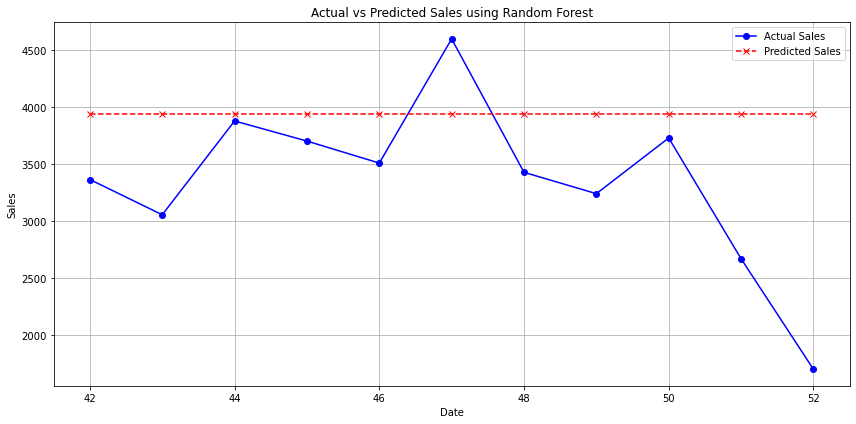

In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define function to train and evaluate the Random Forest Regression Model
def evaluate_regression_model(X_train, y_train, X_test, y_test):
    """
    Trains a RandomForestRegressor model, makes predictions, and evaluates its performance.

    Parameters:
    X_train (pd.DataFrame): Training feature set.
    y_train (pd.Series): Training target variable (sales).
    X_test (pd.DataFrame): Test feature set.
    y_test (pd.Series): Test target variable (actual sales).
    """

    # Step 1: Initialize and Train the Model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Step 2: Make Predictions
    predictions = model.predict(X_test)

    # Step 3: Calculate Evaluation Metrics
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100  # Convert to percentage

    # Step 4: Print Model Evaluation Results
    print(f"MAE: {round(mae, 2)}")
    print(f"RMSE: {round(rmse, 2)}")
    print(f"MAPE: {round(mape, 2)}%")

    # Step 5: Convert Predictions into Pandas Series for visualization
    predictions_series = pd.Series(predictions, index=X_test.index)
    print(predictions_series)

    # Step 6: Visualize Actual vs Predicted Sales
    plt.figure(figsize=(12, 6))
    plt.plot(X_test.index, y_test, label='Actual Sales', color='blue', marker='o')
    plt.plot(X_test.index, predictions_series, label='Predicted Sales', color='red', linestyle='--', marker='x')
    plt.title('Actual vs Predicted Sales using Random Forest')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Running the model evaluation function
evaluate_regression_model(X_train, y_train, X_test, y_test)



##  LSTM Model

In [40]:
! pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable


### LSTM data preparation pipeline

In [41]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Train-Test Split (80% Training, 20% Testing)
train_size = int(0.8 * len(df_weekly_1))
train, test = df_weekly_1[:train_size], df_weekly_1[train_size:]

# Step 2: Normalize the Data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train[['quantity']])
test_scaled = scaler.transform(test[['quantity']])

# Step 3: Create Input Sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])  # Past 'seq_length' observations
        y.append(data[i, 0])  # Next value in the sequence
    return np.array(X), np.array(y)

# Step 4: Prepare Training and Testing Sequences
seq_length = 3  # Using last 3 time steps to predict next
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

# Step 5: Reshape Data for LSTM Input Format (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Output confirmation
print(f"Train Data Shape: {X_train.shape}, {y_train.shape}")
print(f"Test Data Shape: {X_test.shape}, {y_test.shape}")


Train Data Shape: (39, 3, 1), (39,)
Test Data Shape: (8, 3, 1), (8,)


###  LSTM model training and evaluation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
MAE: 619.33
MSE: 649006.67
RMSE: 805.61
MAPE: 24.71%
order_date
2015-11-15    3544.822754
2015-11-22    3619.393799
2015-11-29    3764.505371
2015-12-06    3884.879639
2015-12-13    3867.048340
2015-12-20    3856.596191
2015-12-27    3574.841064
2016-01-03    3442.180908
dtype: float32


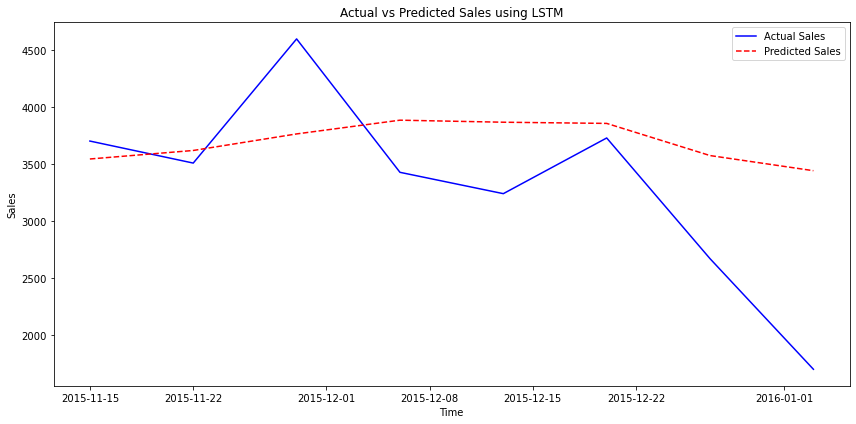

In [42]:
# Import required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to Train & Evaluate LSTM Model
def best_lstm_model(X_train, y_train, X_test, y_test, scaler, test, epochs=50, batch_size=32):
    
    # Step 1: Build LSTM Model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))  # LSTM Layer
    model.add(Dense(1))  # Output Layer
    model.compile(optimizer='adam', loss='mse')  # Compile Model
    
    # Step 2: Train the Model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    
    # Step 3: Make Predictions
    predictions = model.predict(X_test)
    
    # Step 4: Rescale Predictions to Original Scale
    predictions_rescaled = scaler.inverse_transform(predictions)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    # Step 5: Evaluate the Model
    mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
    mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test_rescaled - predictions_rescaled) / y_test_rescaled)) * 100  # Convert to percentage

    # Step 6: Print Evaluation Metrics
    print(f"MAE: {round(mae, 2)}")
    print(f"MSE: {round(mse, 2)}")
    print(f"RMSE: {round(rmse, 2)}")
    print(f"MAPE: {round(mape, 2)}%")
    
    # Step 7: Convert Predictions into Pandas Series
    predictions_series = pd.Series(predictions_rescaled.flatten(), index=test["order_date"][seq_length:])
    print(predictions_series)
    
    # Step 8: Visualize Actual vs Predicted Sales
    plt.figure(figsize=(12, 6))
    plt.plot(test["order_date"][seq_length:], y_test_rescaled, label='Actual Sales', color='blue')
    plt.plot(test["order_date"][seq_length:], predictions_rescaled, label='Predicted Sales', color='red', linestyle='--')
    plt.title('Actual vs Predicted Sales using LSTM')
    plt.xlabel('Time')
    plt.ylabel('Sales')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Execute LSTM Model Training and Evaluation
best_lstm_model(X_train, y_train, X_test, y_test, scaler, test, epochs=50, batch_size=32)


### Model Comparison Plot 

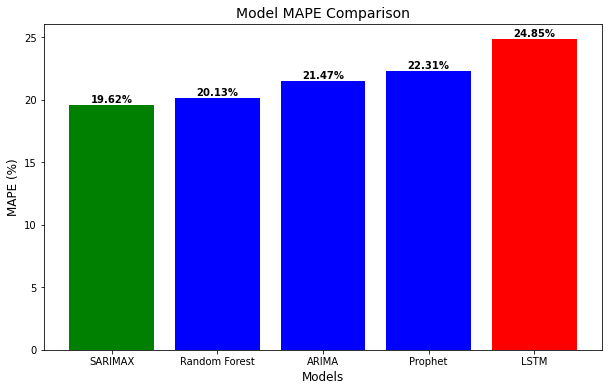

In [44]:
import matplotlib.pyplot as plt

# Updated models and their respective MAPE values from your results
models = ['SARIMAX', 'Random Forest', 'ARIMA', 'Prophet', 'LSTM']
mapes = [19.62, 20.13, 21.47, 22.31, 24.85]  # Updated MAPE values

plt.figure(figsize=(10,6))
plt.bar(models, mapes, color=['green', 'blue', 'blue', 'blue', 'red'])

# Highlighting the best and worst models
plt.title('Model MAPE Comparison', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('MAPE (%)', fontsize=12)

# Annotating the values above each bar
for i, v in enumerate(mapes):
    plt.text(i, v + 0.2, f'{v:.2f}%', ha='center', fontweight='bold')

plt.show()


In [45]:
! pip install --upgrade pmdarima


Defaulting to user installation because normal site-packages is not writeable


In [46]:
df_weekly=pd.read_csv(r"D:\Dominos_Pizza\week_quantity.csv")
df_weekly['order_date'] = pd.to_datetime(df_weekly['order_date'])

df_weekly.set_index('order_date', inplace=True)

In [47]:
df_weekly


,quantity
order_date,
2015-01-04,2248.0
2015-01-11,4173.0
2015-01-18,3567.0
2015-01-25,3674.0
2015-02-01,3666.0
2015-02-08,3824.0
2015-02-15,3634.0
2015-02-22,3574.0
2015-03-01,3989.0


In [48]:
from pmdarima import auto_arima
auto_model = auto_arima(train_data,
                   seasonal=True,
                   m=7,  # Seasonal periodicity
                   stepwise=True,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=615.080, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=617.446, Time=0.59 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=811.015, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=617.078, Time=0.16 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=616.489, Time=0.26 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=615.447, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=615.025, Time=0.15 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=616.992, Time=0.60 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=617.163, Time=0.26 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=617.004, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=619.022, Time=0.32 se

# Model saving

In [49]:
import pickle # Importing pickle for saving the model

# Save the model to a file using pickle
model_filename = 'best_sarima_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(auto_model, file)
print(f"Model saved as {model_filename}")

Model saved as best_sarima_model.pkl


In [50]:
# Loading the model
model_filename = 'best_sarima_model.pkl'
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Forecasting function
def forecast_sales(loaded_model, periods):
    forecast = loaded_model.predict(n_periods=periods)
    return forecast

forecasted_sales = forecast_sales(loaded_model, periods=7)
print(forecasted_sales)

2015-10-25    3557.389787
2015-11-01    3675.103764
2015-11-08    3675.103764
2015-11-15    3675.103764
2015-11-22    3675.103764
2015-11-29    3675.103764
2015-12-06    3675.103764
Freq: W-SUN, dtype: float64


### Forecasting Report Visulazation

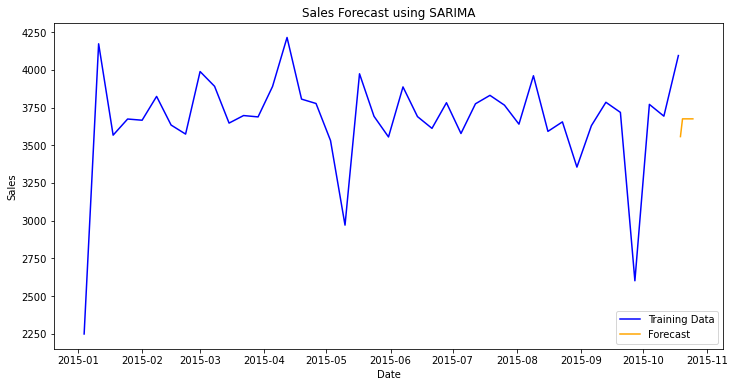

In [56]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load the best SARIMA model
with open('best_sarima_model.pkl', 'rb') as file:
    best_model = pickle.load(file)

# Forecasting for the next 7 days
n_forecast = 7
forecast = best_model.predict(n_periods=n_forecast)

# Ensure the training data index is in datetime format
train_data.index = pd.to_datetime(train_data.index)

# Generate forecast dates starting from the last available date in training data
forecast_dates = pd.date_range(start=train_data.index[-1] + pd.Timedelta(days=1), periods=n_forecast)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='orange')
plt.title('Sales Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


## Quantity of each pizza prediction for one week

In [59]:
df_1=df[["order_date","pizza_name","quantity"]]
df_1["order_date"] = pd.to_datetime(df_1["order_date"])

In [60]:
# Set 'order_date' as the index
df_1.set_index("order_date", inplace=True)

# Resample weekly and group by 'pizza_name', then sum 'quantity'
weekly_summary = df_1.groupby("pizza_name").resample("W")["quantity"].sum().reset_index()

In [61]:
weekly_summary[weekly_summary["pizza_name"]=="The Barbecue Chicken Pizza"]

,pizza_name,order_date,quantity
0,The Barbecue Chicken Pizza,2015-01-04,131.0
1,The Barbecue Chicken Pizza,2015-01-11,277.0
2,The Barbecue Chicken Pizza,2015-01-18,242.0
3,The Barbecue Chicken Pizza,2015-01-25,201.0
4,The Barbecue Chicken Pizza,2015-02-01,240.0
5,The Barbecue Chicken Pizza,2015-02-08,199.0
6,The Barbecue Chicken Pizza,2015-02-15,299.0
7,The Barbecue Chicken Pizza,2015-02-22,195.0
8,The Barbecue Chicken Pizza,2015-03-01,198.0
9,The Barbecue Chicken Pizza,2015-03-08,232.0


In [62]:
weekly_summary


,pizza_name,order_date,quantity
0,The Barbecue Chicken Pizza,2015-01-04,131.0
1,The Barbecue Chicken Pizza,2015-01-11,277.0
2,The Barbecue Chicken Pizza,2015-01-18,242.0
3,The Barbecue Chicken Pizza,2015-01-25,201.0
4,The Barbecue Chicken Pizza,2015-02-01,240.0
...,...,...,...
1691,The Vegetables + Vegetables Pizza,2015-12-06,110.0
1692,The Vegetables + Vegetables Pizza,2015-12-13,168.0
1693,The Vegetables + Vegetables Pizza,2015-12-20,159.0
1694,The Vegetables + Vegetables Pizza,2015-12-27,114.0


## Pizza Sales Forecast Using Auto-ARIMA

                            pizza_name order_date    quantity
0           The Barbecue Chicken Pizza 2016-01-04  211.132075
1           The Barbecue Chicken Pizza 2016-01-05  211.132075
2           The Barbecue Chicken Pizza 2016-01-06  211.132075
3           The Barbecue Chicken Pizza 2016-01-07  211.132075
4           The Barbecue Chicken Pizza 2016-01-08  211.132075
..                                 ...        ...         ...
219  The Vegetables + Vegetables Pizza 2016-01-06  128.382098
220  The Vegetables + Vegetables Pizza 2016-01-07  144.544304
221  The Vegetables + Vegetables Pizza 2016-01-08  142.036375
222  The Vegetables + Vegetables Pizza 2016-01-09  129.496733
223  The Vegetables + Vegetables Pizza 2016-01-10  121.694289

[224 rows x 3 columns]
Total quantity of units sold in the predicted week: 25234 pizzas


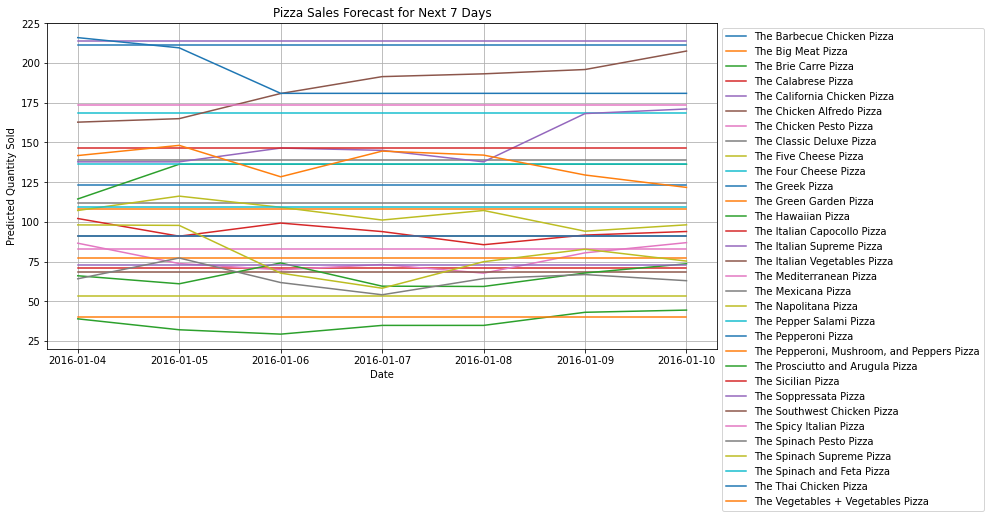

In [63]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Function to forecast pizza sales for the next 7 days
def forecast_pizza_sales(weekly_summary):
    forecast_results = pd.DataFrame()

    # Loop through each unique pizza name
    for pizza in weekly_summary["pizza_name"].unique():
        # Filter data for the specific pizza
        pizza_data = weekly_summary[weekly_summary["pizza_name"] == pizza]
        
        # Drop the non-numeric 'pizza_name' column and set 'order_date' as index
        pizza_data = pizza_data.set_index("order_date").drop(columns=["pizza_name"])
        
        # Fit the auto_arima model
        auto_model = auto_arima(
            pizza_data,
            seasonal=True,
            m=7,  # Seasonal periodicity (weekly)
            stepwise=True,
            trace=False,  # Set to True if you want to see the model tuning process
            error_action='ignore',
            suppress_warnings=True
        )
        
        # Forecast the next 7 days
        forecast = auto_model.predict(n_periods=7)
        
        # Get the next 7 days’ dates
        next_week_dates = pd.date_range(pizza_data.index.max() + pd.Timedelta(days=1), periods=7, freq='D')
        
        # Append forecast results for each pizza
        temp_df = pd.DataFrame({
            "pizza_name": [pizza] * 7,
            "order_date": next_week_dates,
            "quantity": forecast
        })
        
        # Concatenate results
        forecast_results = pd.concat([forecast_results, temp_df], ignore_index=True)

    # Print forecast results
    print(forecast_results)
    
    # Calculate the total quantity of units sold in the predicted week
    total_quantity = forecast_results["quantity"].sum()
    print(f"Total quantity of units sold in the predicted week: {round(total_quantity)} pizzas")
    
    # Plot forecast results
    plt.figure(figsize=(12, 6))
    for pizza in forecast_results["pizza_name"].unique():
        plt.plot(
            forecast_results[forecast_results["pizza_name"] == pizza]["order_date"],
            forecast_results[forecast_results["pizza_name"] == pizza]["quantity"],
            label=pizza
        )
    
    plt.title('Pizza Sales Forecast for Next 7 Days')
    plt.xlabel('Date')
    plt.ylabel('Predicted Quantity Sold')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid()
    plt.show()

    return forecast_results, total_quantity

# Run the function on your dataset
forecast_results, total_quantity = forecast_pizza_sales(weekly_summary)


In [64]:
import pandas as pd
from pmdarima import auto_arima

def forecast_pizza_sales(weekly_summary):
    forecast_results = pd.DataFrame()

    # Loop through each unique pizza name
    for pizza in weekly_summary["pizza_name"].unique():
        # Filter data for the specific pizza
        pizza_data = weekly_summary[weekly_summary["pizza_name"] == pizza]
        
        # Drop the non-numeric 'pizza_name' column and set 'order_date' as index
        pizza_data = pizza_data.set_index("order_date").drop(columns=["pizza_name"])
        
        # Fit the auto_arima model
        auto_model = auto_arima(
            pizza_data,
            seasonal=True,
            m=7,  # Seasonal periodicity (weekly)
            stepwise=True,
            trace=True,
            error_action='ignore',
            suppress_warnings=True
        )
        
        # Print the model summary
        print(f"Model Summary for {pizza}:")
        print(auto_model.summary())
        
        # Forecast the next 7 days
        forecast = auto_model.predict(n_periods=7)
        
        # Get the next 7 days’ dates
        next_week_dates = pd.date_range(pizza_data.index.max() + pd.Timedelta(days=1), periods=7, freq='D')
        
        # Append forecast results for each pizza
        temp_df = pd.DataFrame({
            "pizza_name": [pizza] * 7,
            "order_date": next_week_dates,
            "quantity": forecast
        })
        
        # Concatenate results
        forecast_results = pd.concat([forecast_results, temp_df], ignore_index=True)

    # Output the forecasted quantities
    print(forecast_results)
    
    # Calculate the total quantity of units sold in the predicted week
    total_quantity = forecast_results["quantity"].sum()
    print(f"Total quantity of units sold in the predicted week: {round(total_quantity)} pizzas")
    
    return forecast_results, total_quantity

# Example usage
forecast_results, total_quantity = forecast_pizza_sales(weekly_summary)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=550.315, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=553.470, Time=0.58 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=553.440, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=721.817, Time=0.03 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=551.603, Time=0.31 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=551.642, Time=0.16 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=553.612, Time=0.54 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=552.230, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=552.199, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=554.238, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[7] intercept
Total fit time: 3.420 seconds
Model Summary for The Barbecue Chicken Pizza:
                               SARIMAX Results                                
Dep. Variable:                      y   No. 

 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=465.431, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=468.607, Time=0.45 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=468.691, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=607.450, Time=0.03 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=467.432, Time=0.16 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=467.417, Time=0.12 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=469.417, Time=0.31 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=466.611, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=466.693, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=468.554, Time=0.16 sec

Best model:  ARIMA(0,0,0)(0,0,0)[7] intercept
Total fit time: 2.943 seconds
Model Summary for The Calabrese Pizza:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   53
Model:         

 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=481.040, Time=0.77 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=479.110, Time=0.43 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=480.599, Time=0.40 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=482.593, Time=1.08 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=484.854, Time=0.12 sec
 ARIMA(2,0,0)(0,0,1)[7] intercept   : AIC=480.494, Time=0.59 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=480.070, Time=0.41 sec
 ARIMA(2,0,1)(0,0,1)[7] intercept   : AIC=482.166, Time=0.40 sec
 ARIMA(1,0,0)(0,0,1)[7]             : AIC=534.625, Time=0.11 sec

Best model:  ARIMA(1,0,0)(0,0,1)[7] intercept
Total fit time: 7.113 seconds
Model Summary for The Chicken Pesto Pizza:
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   53
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 7)   Log Likelihood                -235.555
Date:              

 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=529.854, Time=0.31 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=530.055, Time=0.15 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=531.671, Time=0.40 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=530.539, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=530.559, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=532.700, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[7] intercept
Total fit time: 3.053 seconds
Model Summary for The Four Cheese Pizza:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   53
Model:                        SARIMAX   Log Likelihood                -262.803
Date:                Sat, 01 Feb 2025   AIC                            529.605
Time:                        23:57:41   BIC                            533.546
Sample:                    01-04-2015   HQIC                           531.121
                  

 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=500.056, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=497.626, Time=0.08 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=499.497, Time=0.43 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=501.510, Time=0.56 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=499.424, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=501.439, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[7]             : AIC=621.466, Time=0.08 sec

Best model:  ARIMA(0,0,1)(0,0,0)[7] intercept
Total fit time: 5.252 seconds
Model Summary for The Hawaiian Pizza:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   53
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -245.813
Date:                Sat, 01 Feb 2025   AIC                            497.626
Time:                        23:57:52   BIC                            503.537
Sample:                    01-04-20

 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=462.333, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=457.010, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=460.970, Time=0.36 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=460.954, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=603.439, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=458.970, Time=0.21 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=458.954, Time=0.09 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=460.952, Time=0.35 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=459.009, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=459.009, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=458.135, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[7] intercept
Total fit time: 2.809 seconds
Model Summary for The Italian Vegetables Pizza:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   53
Mo

 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=500.719, Time=0.68 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=498.769, Time=0.17 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=502.740, Time=0.81 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=499.226, Time=0.56 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=500.333, Time=0.38 sec
 ARIMA(0,0,0)(1,0,0)[7]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,0,0)(1,0,0)[7] intercept
Total fit time: 5.751 seconds
Model Summary for The Napolitana Pizza:
                                SARIMAX Results                                
Dep. Variable:                       y   No. Observations:                   53
Model:             SARIMAX(1, 0, 0, 7)   Log Likelihood                -246.372
Date:                 Sat, 01 Feb 2025   AIC                            498.745
Time:                         23:58:33   BIC                            504.656
Sample:                     01-04-2015   HQIC                           501.018
                 

 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=449.298, Time=0.93 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=443.454, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=445.113, Time=0.48 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=445.951, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=594.911, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=443.120, Time=0.25 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=441.418, Time=0.54 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=442.323, Time=0.72 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=441.294, Time=0.53 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=443.951, Time=0.16 sec
 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=441.926, Time=0.79 sec
 ARIMA(0,0,0)(0,0,2)[7] intercept   : AIC=443.003, Time=0.23 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=444.584, Time=0.93 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=443.249, Time=0.59 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=443.246, Time=0.67 sec
 ARIMA(1,0,1)(1,0,1)[7] i

 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=524.129, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=523.057, Time=0.47 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=523.652, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=705.067, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=523.610, Time=0.10 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=525.011, Time=0.64 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=525.146, Time=0.53 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=523.139, Time=0.50 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=526.896, Time=0.99 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=524.893, Time=0.23 sec
 ARIMA(2,0,0)(1,0,0)[7] intercept   : AIC=524.932, Time=0.71 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=523.628, Time=0.36 sec
 ARIMA(2,0,1)(1,0,0)[7] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(1,0,0)(1,0,0)[7]             :

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=493.123, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=488.655, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=491.156, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=486.972, Time=0.09 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=488.635, Time=0.19 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=478.851, Time=0.13 sec
 ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=480.775, Time=0.25 sec
 ARIMA(2,1,0)(0,0,1)[7] intercept   : AIC=480.776, Time=0.23 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(3,1,0)(0,0,0)[7] intercept   : AIC=473.119, Time=0.20 sec
 ARIMA(3,1,0)(1,0,0)[7] intercept   : AIC=475.117, Time=0.37 sec
 ARIMA(3,1,0)(0,0,1)[7] intercept   : AIC=475.118, Time=0.40 se

 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=530.423, Time=0.74 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=528.594, Time=0.29 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=525.956, Time=0.12 sec
 ARIMA(0,0,2)(1,0,0)[7] intercept   : AIC=527.886, Time=0.56 sec
 ARIMA(0,0,2)(0,0,1)[7] intercept   : AIC=527.452, Time=0.24 sec
 ARIMA(0,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=529.635, Time=0.20 sec
 ARIMA(0,0,3)(0,0,0)[7] intercept   : AIC=526.911, Time=0.18 sec
 ARIMA(1,0,3)(0,0,0)[7] intercept   : AIC=526.620, Time=0.54 sec
 ARIMA(0,0,2)(0,0,0)[7]             : AIC=624.571, Time=0.24 sec

Best model:  ARIMA(0,0,2)(0,0,0)[7] intercept
Total fit time: 6.965 seconds
Model Summary for The Thai Chicken Pizza:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   53
Model:               SARIMAX(0, 0, 2)   Log Likelihood                -258.97

In [65]:
forecast_results

,pizza_name,order_date,quantity
0,The Barbecue Chicken Pizza,2016-01-04,211.132075
1,The Barbecue Chicken Pizza,2016-01-05,211.132075
2,The Barbecue Chicken Pizza,2016-01-06,211.132075
3,The Barbecue Chicken Pizza,2016-01-07,211.132075
4,The Barbecue Chicken Pizza,2016-01-08,211.132075
...,...,...,...
219,The Vegetables + Vegetables Pizza,2016-01-06,128.382098
220,The Vegetables + Vegetables Pizza,2016-01-07,144.544304
221,The Vegetables + Vegetables Pizza,2016-01-08,142.036375
222,The Vegetables + Vegetables Pizza,2016-01-09,129.496733


In [70]:
df_ingredients= pd.read_excel(r"D:\Dominos_Pizza\Pizza_ingredients.xlsx")
df_ingredients

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0
...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0


In [71]:
# Assuming forecast_pizza_sales has been run already and forecast_results is available

# Copy the ingredients DataFrame
ingredients_predicted = df_ingredients.copy()

# Map the predicted quantities from forecast_results
ingredients_predicted['predicted_quantity'] = ingredients_predicted['pizza_name'].map(
    forecast_results.set_index('pizza_name')['quantity'].to_dict()
)

# Calculate the total ingredient quantity needed
ingredients_predicted['total_ingredient_qty'] = ingredients_predicted['Items_Qty_In_Grams'] * ingredients_predicted['predicted_quantity']

# Sum the quantities for each ingredient
ingredient_totals = round(ingredients_predicted.groupby('pizza_ingredients')['total_ingredient_qty'].sum()).to_dict()

print("Total quantity of predicted ingredients for the following week:")
final_df=pd.DataFrame(list(ingredient_totals.items()), columns=['Ingredient', 'Total_Quantity'])
final_df

Total quantity of predicted ingredients for the following week:


,Ingredient,Total_Quantity
0,?duja Salami,8486.0
1,Alfredo Sauce,4109.0
2,Anchovies,8341.0
3,Artichokes,30473.0
4,Arugula,2208.0
...,...,...
59,Sun-dried Tomatoes,4368.0
60,Thai Sweet Chilli Sauce,10856.0
61,Thyme,222.0
62,Tomatoes,144092.0


In [73]:
# Define the correct file path
path = r"D:\Dominos_Pizza\final_df.csv"

# Save the DataFrame as a CSV file
final_df.to_csv(path, index=False)

print(f"File saved successfully at: {path}")


File saved successfully at: D:\Dominos_Pizza\final_df.csv
